In [1]:
# You just have to, everyone has to.
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('http://bit.ly/kaggletrain')

In [2]:
# data cleaning, data exploration, ....

df.info()

df.isna().sum()

df.nunique()

print(df.dtypes)

df = df.drop((['Name','PassengerId','Cabin','Ticket']),axis=1)


df['Sex'] = df['Sex'].map({'female':0,'male':1})


copy = df.copy()

copy.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin         

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


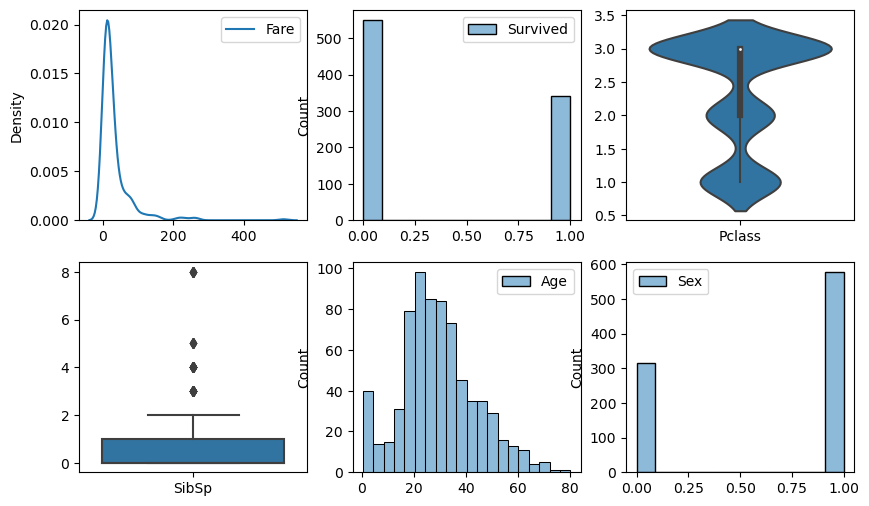

In [3]:
# Summary stats
def misc(copy):
    plt_,ax1 = plt.subplots(2,3,figsize=(10,6))
    sns.kdeplot(copy[['Fare']],ax=ax1[0,0])
    sns.histplot(copy[['Survived']],ax=ax1[0,1])
    sns.violinplot(copy[['Pclass']],ax=ax1[0,2])
    sns.boxplot(copy[['SibSp']],ax=ax1[1,0])
    sns.histplot(copy[['Age']],ax=ax1[1,1])
    sns.histplot(copy[['Sex']],ax=ax1[1,2])
    plt.show()


misc(copy)

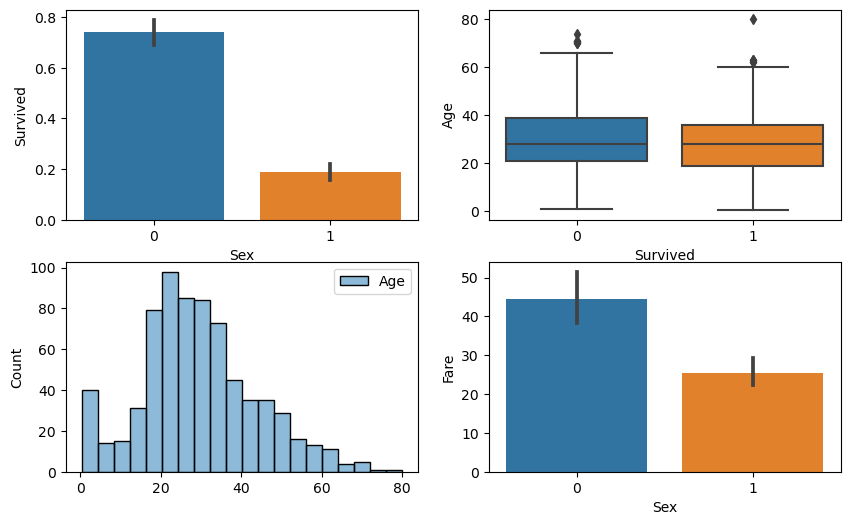

In [4]:
def more_subs(copy):
    plt_2,ax2 = plt.subplots(2,2,figsize=(10,6))
    sns.barplot(copy,x='Sex',y='Survived',ax=ax2[0,0])
    sns.boxplot(copy,x='Survived',y='Age',ax=ax2[0,1])
    sns.histplot(copy[['Age']],ax=ax2[1,0])
    sns.barplot(copy,x='Sex',y='Fare',ax=ax2[1,1])
    plt.show()



more_subs(copy)


In [9]:
# Survived is the target,6 models will be used
X = df.drop('Survived',axis=1)
y = df[['Survived']]

y.value_counts(normalize=True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


clf = LogisticRegression()

rfc = RandomForestClassifier()

knn = KNeighborsClassifier(n_neighbors=13)

tree_clf = DecisionTreeClassifier()

gb = GradientBoostingClassifier()

nb = GaussianNB()

In [7]:
# onehotencoder is needed to transform the object variables that are categorical into numerical values
# simpleimputer is needed to fill the missing values for the 'age' feature, the mean will be used to fill in the NAs

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()

imp = SimpleImputer(strategy='mean')


ct = make_column_transformer((ohe,['Pclass','Embarked','Sex']),(imp,['Age']),remainder='passthrough')



ct.fit_transform(X)


from sklearn.pipeline import make_pipeline

pipe_clf = make_pipeline(ct,clf).fit(X_train,y_train)
pred_clf = pipe_clf.predict(X_test)
clf_pred_prob = pipe_clf.predict_proba(X_test)[::,1]

pipe_rfc = make_pipeline(ct,rfc).fit(X_train,y_train)
pred_rfc = pipe_rfc.predict(X_test)
rfc_pred_prob = pipe_rfc.predict_proba(X_test)[::,1]

pipe_knn = make_pipeline(ct,knn).fit(X_train,y_train)
pred_knn = pipe_knn.predict(X_test)
knn_pred_prob = pipe_knn.predict_proba(X_test)[::,1]


pipe_tree = make_pipeline(ct,tree_clf).fit(X_train,y_train)
pred_tree = pipe_tree.predict(X_test)
pred_prob_tree = pipe_tree.predict_proba(X_test)[::,1]


pipe_gb = make_pipeline(ct,gb).fit(X_train,y_train)
gb_pred = pipe_gb.predict(X_test)
gb_pred_prob = pipe_gb.predict_proba(X_test)[::,1]

nb_pipe = make_pipeline(ct,nb).fit(X_train,y_train)
nb_pred = nb_pipe.predict(X_test)
nb_pred_prob = nb_pipe.predict_proba(X_test)[::,1]

Logistic Regression - Accuracy: 79.33%, ROC-AUC: 83.68%
Random Forest - Accuracy: 78.77%, ROC-AUC: 83.90%
Naive Bayes - Accuracy: 72.63%, ROC-AUC: 82.31%
Gradient Boosting - Accuracy: 77.65%, ROC-AUC: 85.22%
KNN - Accuracy: 69.83%, ROC-AUC: 71.23%


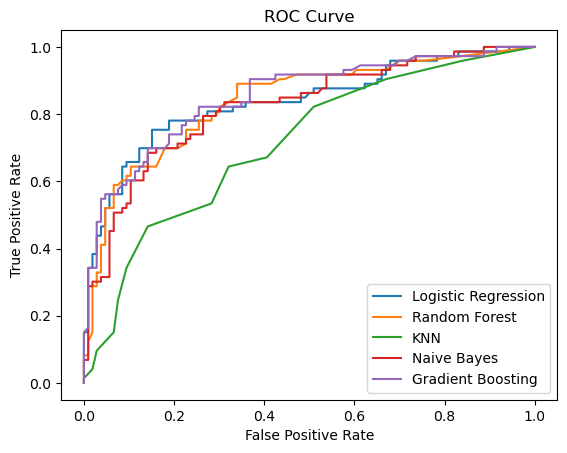

In [10]:
# Performance of the models and ROC curve to compare every model
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

def evaluate_model(model_name,y_true,y_pred,y_pred_prob):
    acc = accuracy_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred_prob)
    print(f'{model_name} - Accuracy: {acc * 100:.2f}%, ROC-AUC: {roc * 100:.2f}%')

evaluate_model('Logistic Regression', y_test,pred_clf,clf_pred_prob)
evaluate_model('Random Forest', y_test,pred_rfc,rfc_pred_prob)
evaluate_model('Naive Bayes', y_test,nb_pred,nb_pred_prob)
evaluate_model('Gradient Boosting',y_test,gb_pred,gb_pred_prob)
evaluate_model('KNN', y_test,pred_knn, knn_pred_prob)



def roc_curve_plot(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr,tpr,label=model_name)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

roc_curve_plot(y_test,clf_pred_prob,'Logistic Regression')
roc_curve_plot(y_test,rfc_pred_prob,'Random Forest')
roc_curve_plot(y_test,knn_pred_prob,'KNN')
roc_curve_plot(y_test,nb_pred_prob,'Naive Bayes')
roc_curve_plot(y_test,gb_pred_prob,'Gradient Boosting')
plt.legend()
plt.show()
